In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('suicide.csv')

In [3]:
data

,Indicator,Geography,Year,Strata,Strata Name,Numerator,Denominator,Rate,Age Adjusted Rate
0,Suicide,CALIFORNIA,2000,Sex,Female,682,17080000,3.993,4.067
1,Suicide,CALIFORNIA,2000,Sex,Male,2431,16920000,14.370,15.890
2,Suicide,CALIFORNIA,2000,Sex,Total,3113,34000000,9.156,9.564
3,Suicide,CALIFORNIA,2001,Sex,Female,685,17340000,3.950,4.005
4,Suicide,CALIFORNIA,2001,Sex,Male,2571,17170000,14.970,16.410
...,...,...,...,...,...,...,...,...,...
1399,Suicide,Butte,2015-2017,Sex,Total,128,676000,18.940,18.310
1400,Suicide,Santa Cruz,2015-2017,Sex,Total,136,829300,16.400,15.740
1401,Suicide,Sonoma,2015-2017,Sex,Total,205,1512000,13.550,12.190
1402,Suicide,Trinity,2015-2017,Sex,Total,16,40490,39.510,43.870


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Indicator          1404 non-null   object 
 1   Geography          1404 non-null   object 
 2   Year               1404 non-null   object 
 3   Strata             1404 non-null   object 
 4   Strata Name        1404 non-null   object 
 5   Numerator          1404 non-null   int64  
 6   Denominator        1404 non-null   int64  
 7   Rate               1404 non-null   float64
 8   Age Adjusted Rate  1404 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 98.8+ KB


In [5]:
data.isnull().sum()

Indicator            0
Geography            0
Year                 0
Strata               0
Strata Name          0
Numerator            0
Denominator          0
Rate                 0
Age Adjusted Rate    0
dtype: int64

In [6]:
data.describe()

,Numerator,Denominator,Rate,Age Adjusted Rate
count,1404.000000,1.404000e+03,1404.000000,1404.000000
mean,369.424501,3.740042e+06,12.699789,12.245679
std,1162.425801,1.089204e+07,8.033526,7.350448
min,11.000000,2.697000e+04,2.088000,2.184000
25%,31.000000,2.998250e+05,6.022000,6.042000
50%,75.500000,6.661000e+05,11.040000,10.910000
75%,181.750000,2.083750e+06,17.022500,16.295000
max,12560.000000,1.181000e+08,48.890000,52.250000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns







C:\Users\mhb17\AppData\Local\Temp\ipykernel_5576\3348889675.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


NameError: name 'dataset' is not defined

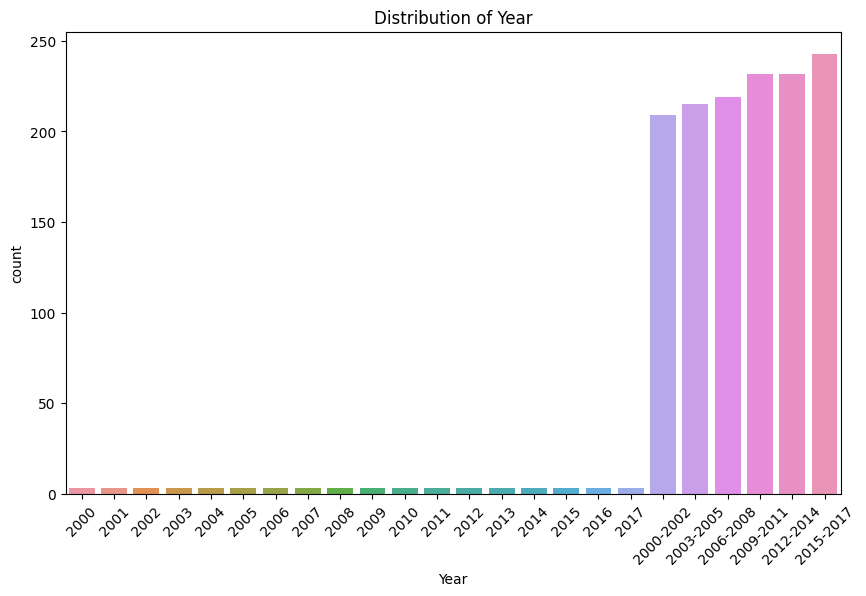

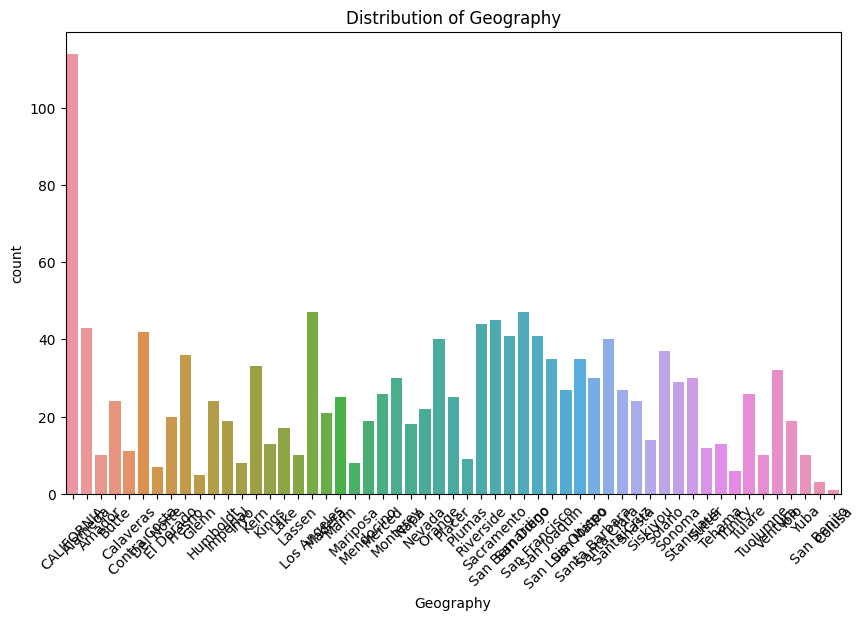

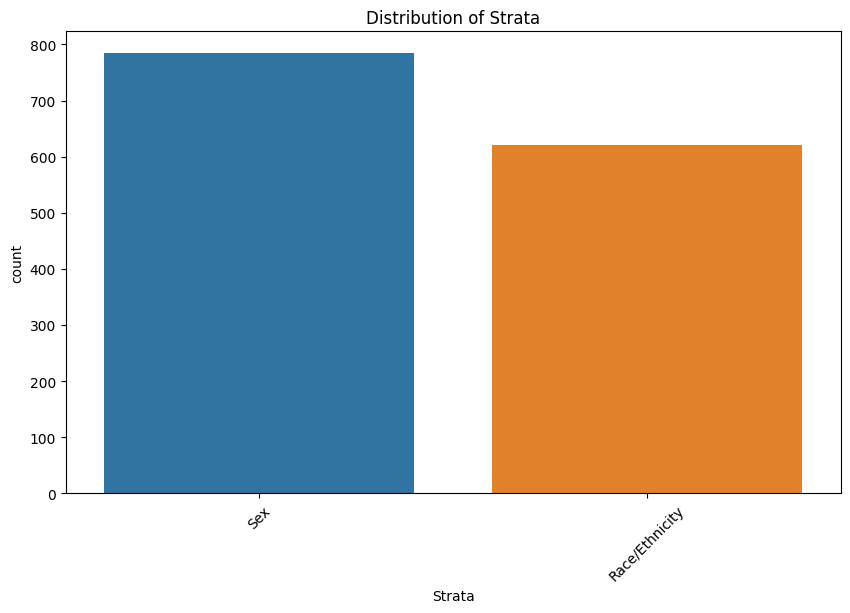

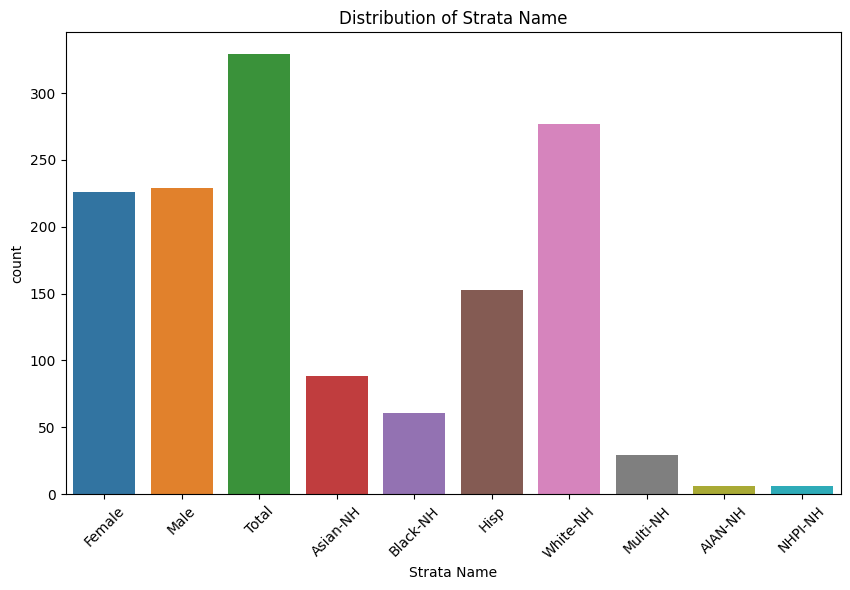

In [20]:
# Explore categorical variables
categorical_cols = ['Year', 'Geography', 'Strata', 'Strata Name']  # Add the actual categorical column names
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

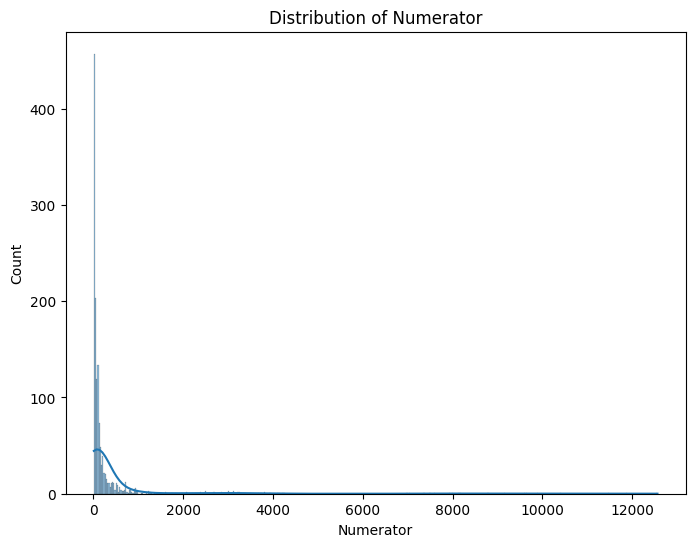

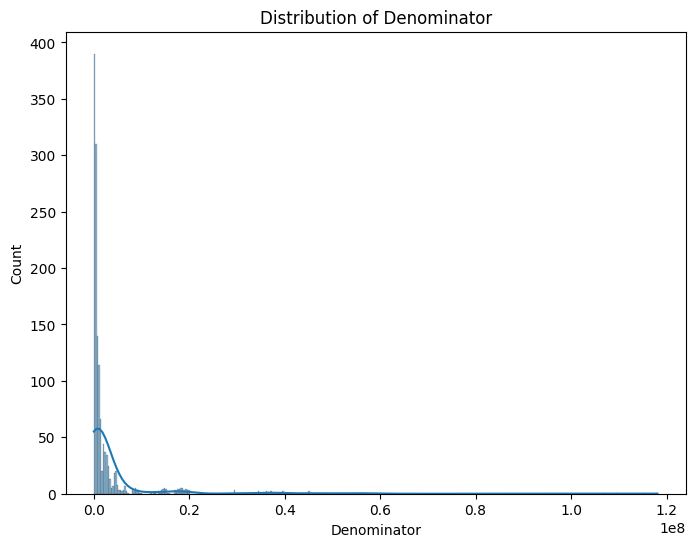

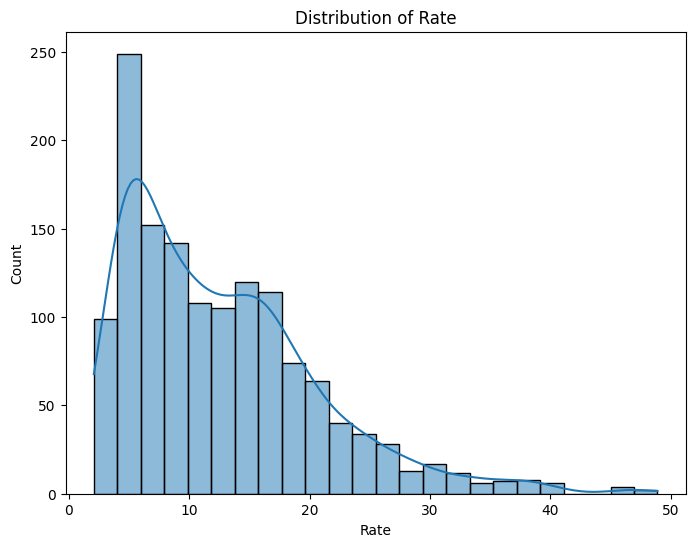

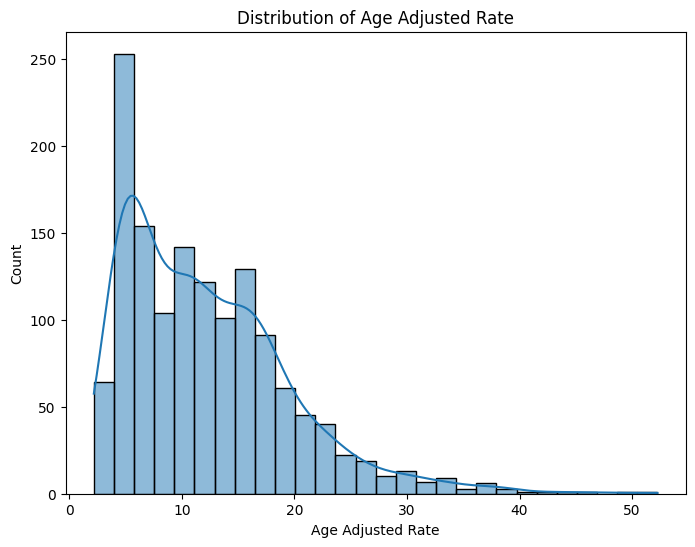

In [21]:
# Explore numerical variables
numerical_cols = ['Numerator', 'Denominator', 'Rate', 'Age Adjusted Rate']  # Add the actual numerical column names
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\mhb17\AppData\Local\Temp\ipykernel_5576\1004950830.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


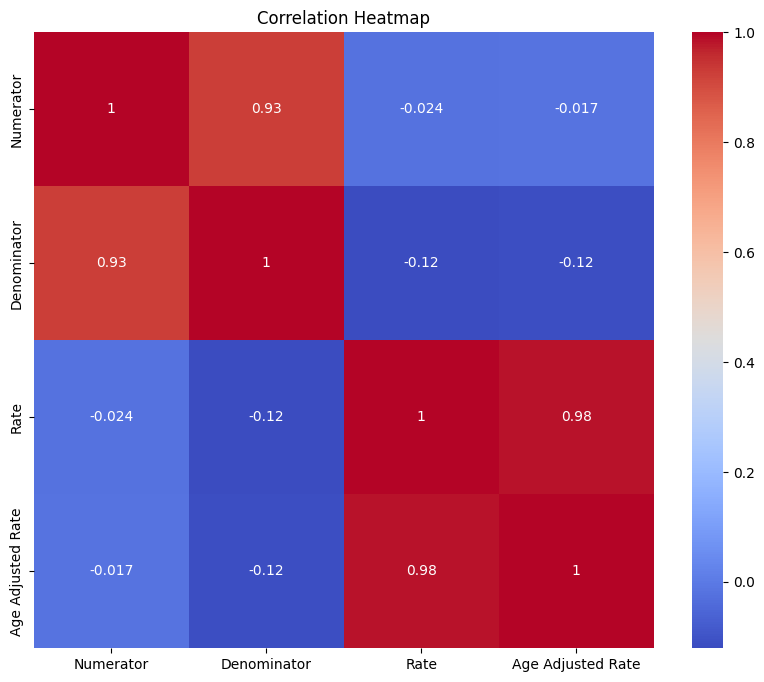

In [19]:
corr_matrix = data.corr()
# Correlation heatmap
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Separate features (X) and target variable (y)
X = data.drop(['Indicator', 'Geography', 'Strata', 'Strata Name'], axis=1)  # Adjust the column names accordingly
y = data['Year']  # Replace 'Target_Variable' with the actual column name

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Initialize and train models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    MLPClassifier()
]

In [29]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__}: {accuracy}")

ValueError: could not convert string to float: 'Merced'